<a href="https://colab.research.google.com/github/gaesu96/gaesu_public/blob/main/%08warship_detect_project_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# google drive상 필요한 폴더 생성(최초 1회만 주석 해제 후 실행)

# !mkdir '/content/drive/MyDrive/warship_detect_project'
# !mkdir '/content/drive/MyDrive/warship_detect_project/raw_datasets'
# !mkdir '/content/drive/MyDrive/warship_detect_project/raw_datasets/hull_num_images'
# !mkdir '/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images'
# !mkdir '/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_xml'
# !mkdir '/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_txt'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets/images'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets/images/train'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets/images/val'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets/labels'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets/labels/train'
# !mkdir '/content/drive/MyDrive/warship_detect_project/datasets/labels/val'
# !mkdir /content/drive/MyDrive/warship_detect_project/hull_num_datasets
# !mkdir /content/drive/MyDrive/warship_detect_project/hull_num_datasets/images
# !mkdir /content/drive/MyDrive/warship_detect_project/hull_num_datasets/labels

In [ ]:
# goole drive상 데이터셋 zip 파일 압축 해제(최초 1회만 주석 해제후 실행)

# !unzip -q '/content/해군함정 데이터셋.zip' -d '/content/drive/MyDrive/warship_detect_project/raw_datasets/hull_num_images/'
# !unzip -q '/content/해군함정 데이터셋2.zip' -d '/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/'

mkdir: cannot create directory ‘/content/drive/MyDrive/warship_detect_project/datasets/images2’: File exists


In [2]:
import os
import shutil
img_path = '/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/'

# warship_images 폴더에 있는 txt파일들을 labels_txt 폴더로 이동
def split_dataset_txt(img_path):
  file_list = os.listdir(img_path)
  for file in file_list:
    file_format = file[file.rfind('.'):]
    if file_format == '.txt':
      shutil.move('/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/'+file, '/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_txt/'+file)

split_dataset_txt(img_path)

In [3]:
# warship_images 폴더에 있는 xml 파일들을 labels_xml 폴더로 이동
def split_dataset_xml(img_path):
  file_list = os.listdir(img_path)
  for file in file_list:
    file_format = file[file.rfind('.'):]
    if file_format == '.xml':
      shutil.move('/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/'+file, '/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_xml/'+file)

split_dataset_xml(img_path)

In [4]:
# txt, xml 파일이 모두 있는지 확인
def check_exists_xml(xml_path, img_path):
  xml_list = os.listdir(xml_path)
  img_list = os.listdir(img_path)
  not_exists_xml = []
  for img in img_list:
    xml_file = os.path.join(xml_path, os.path.splitext(img)[0] + '.xml')
    if not os.path.exists(xml_file):
      not_exists_xml.append(os.path.splitext(img)[0])
  return not_exists_xml

def check_exists_txt(txt_path, img_path):
  txt_list = os.listdir(txt_path)
  img_list = os.listdir(img_path)
  not_exists_txt = []
  for img in img_list:
    txt_file = os.path.join(txt_path, os.path.splitext(img)[0] + '.txt')
    if not os.path.exists(txt_file):
      not_exists_txt.append(os.path.splitext(img)[0])
  return not_exists_txt

img_path = '/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/'
txt_path = '/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_txt/'
xml_path = '/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_xml/'
img_list = os.listdir(img_path)

print(f'총 img 파일개수: {len(img_list)}')
print(f'txt가 없는 파일: {len(check_exists_txt(txt_path, img_path))}개 {check_exists_txt(txt_path, img_path)}')
print(f'xml이 없는 파일: {len(check_exists_xml(xml_path, img_path))}개 {check_exists_xml(xml_path, img_path)}')

총 img 파일개수: 1250
txt가 없는 파일: 116개 ['bs_6112_1', 'bs_6112_2', 'bs_6112_3', 'bs_6111_1', 'bs_6111_2', 'bs_6111_3', 'bs_6111_4', 'bs_6111_5', 'bs_6111_6', 'bs_6112_4', 'bs_6111_7', 'bs_6112_5', 'bs_6111_8', 'bs_6111_9', 'bs_972_8', 'bs_972_10', 'bs_6111_10', 'bs_211_3', 'bs_572_1', 'bs_6111_11', 'bs_6112_6', 'bs_6112_7', 'bs_6112_8', 'bs_6112_9', 'bs_572_2', 'bs_991_31', 'bs_991_32', 'bs_991_33', 'bs_991_34', 'bs_991_35', 'bs_991_38', 'bs_58_6', 'bs_51_20', 'bs_776', 'bs_977_17', 'bs_721', 'bs_779', 'bs_781', 'bs_773', 'bs_769', 'bs_783', 'bs_765', 'bs_766_6', 'bs_32_1-', 'bs_51_21', 'bs_811_30', 'bs_818_22', 'bs_818_23', 'bs_812_16', 'bs_812_17', 'bs_818_24', 'bs_813_25', 'bs_813_16', 'bs_819', 'bs_816_10', 'bs_815_20', 'bs_815_8', 'bs_813_17', 'bs_813_18', 'bs_711_11 (2)', 'bs_719', 'bs_715', 'bs_712_6', 'bs_712_7', 'bs_717', 'bs_727', 'bs_722', 'bs_723_6', 'bs_811_27', 'bs_723_7', 'bs_729', 'bs_570_18', 'bs_570_19', 'bs_570_20_', 'bs_570_21', 'bs_32_36', 'bs_32_37', 'bs_31_20', 'bs_32_

In [ ]:
!mkdir /content/drive/MyDrive/warship_detect_project/datasets/raw_images
!mkdir /content/drive/MyDrive/warship_detect_project/datasets/raw_labels

In [ ]:
import os
import shutil

def split_data(labels_txt):
  labels_txt_list = os.listdir(labels_txt)
  for txt in labels_txt_list:
    labels_txt_names = os.path.splitext(txt)[0]
    train_label_names = labels_txt_names + '.txt'
    train_img_names = labels_txt_names + '.jpg'
    ship_detect_files = labels_txt_names[:labels_txt_names.rfind('_')]
    if ship_detect_files == 'bs':
      shutil.copy('/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/' + train_img_names, '/content/drive/MyDrive/warship_detect_project/hull_num_datasets/images/' + train_img_names)
      shutil.copy('/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_txt/' + train_label_names, '/content/drive/MyDrive/warship_detect_project/hull_num_datasets/labels/' + train_label_names)
    else:
      shutil.copy('/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/' + train_img_names, '/content/drive/MyDrive/warship_detect_project/datasets/raw_images/' + train_img_names)
      shutil.copy('/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_txt/' + train_label_names, '/content/drive/MyDrive/warship_detect_project/datasets/raw_labels/' + train_label_names)

split_data('/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_txt')

In [249]:
# txt파일을 읽어서 각 파일별 class id 확인 후 이상한 class id 추출
def txt_parsing(txt_path):
  class_id = []
  with open(txt_path, 'r') as f:
    while True:
      output = f.readline()
      if not output: break
      class_id.append(output.split(' ')[0])
  return class_id
label_path = '/content/drive/MyDrive/warship_detect_project/datasets/raw_labels/'
labels_list = os.listdir('/content/drive/MyDrive/warship_detect_project/datasets/raw_labels')
strange_list = []
for label in labels_list:
  if len(txt_parsing(label_path + label)) > 2:
    strange_list.append(label)

print(len(strange_list))

47


In [244]:
# 이상한 class id를 가진 txt 파일 폴더 이동
save_list_idx = [39,
             40,
             41,
             42,
             43,
             44,
             45,
             46,
             47,
             48,
             49,
             50,
             51,
             52,
             53,
             54,
             55,
             56,
             57,
             58,
             59,
             60,
             61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
             71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
             81, 82, 83, 84, 85]
remove_list = []
for idx, i in enumerate(strange_list):
  if idx not in save_list_idx:
    remove_list.append(i)



['bs_991_1.txt', 'bs_991_2.txt', 'bs_991_4.txt', 'bs_991_6.txt', 'bs_991_11.txt', 'bs_991_12.txt', 'bs_991_23.txt', 'bs_991_27.txt', 'bs_992_1.txt', 'bs_992_12.txt', 'bs_992_14.txt', 'bs_992_17.txt', 'bs_992_18.txt', 'bs_992_22.txt', 'bs_992_23.txt', 'bs_993_6.txt', 'bs_993_7.txt', 'bs_993_12.txt', 'bs_993_14.txt', 'bs_993_20.txt', 'bs_993_22.txt', 'bs_993_24.txt', 'bs_993_25.txt', 'bs_993_30.txt', 'bs_991_26.txt', 'bs_288_1.txt', 'bs_325_2.txt', 'bs_325_3.txt', 'bs_325_4.txt', 'bs_333_1.txt', 'bs_335_1.txt', 'bs_338_1.txt', 'bs_357_1.txt', 'bs_361_2.txt', 'bs_361_3.txt', 'bs_361_4.txt', 'bs_361_5.txt', 'bs_361_6.txt', 'bs_375_1.txt', 'bs_326_1.txt', 'bs_325_1.txt', 'bs_758_2.txt', 'bs_817_3.txt', 'bs_975_5.txt', 'bs_32_1.txt', 'bs_58_3.txt', 'bs_327_1.txt', 'bs_361_1.txt', 'bs_560_4.txt', 'bs_570_1.txt', 'bs_570_3.txt', 'bs_711_1.txt', 'bs_712_2.txt', 'bs_762_2.txt', 'bs_762_3.txt', 'bs_767_4.txt', 'bs_768_1.txt', 'bs_768_2.txt', 'bs_768_3.txt', 'bs_771_2.txt', 'bs_773_1.txt', 'bs_773

In [248]:
# 이상한 class id를 가진 txt 파일 폴더 이동

raw_images_list = os.listdir('/content/drive/MyDrive/warship_detect_project/datasets/raw_images')
raw_labels_list = os.listdir('/content/drive/MyDrive/warship_detect_project/datasets/raw_labels')
for img, label in zip(raw_images_list, raw_labels_list):
   if label in remove_list:
    shutil.move('/content/drive/MyDrive/warship_detect_project/datasets/raw_images/' + img, '/content/drive/MyDrive/warship_detect_project/hull_num_datasets/images/' + img)
    shutil.move('/content/drive/MyDrive/warship_detect_project/datasets/raw_labels/' + label, '/content/drive/MyDrive/warship_detect_project/hull_num_datasets/labels/' + label)

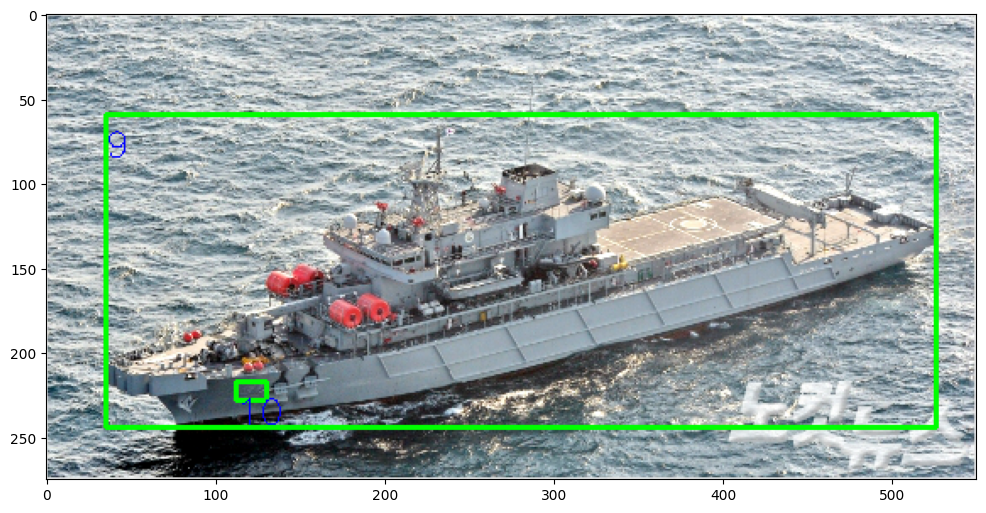

In [281]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/warship_detect_project/datasets/images/train/bs_31_001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
draw_img = img.copy()
height = img.shape[0]
width = img.shape[1]

with open('/content/drive/MyDrive/warship_detect_project/datasets/labels/train/bs_31_001.txt') as f:
  line = f.readlines()

  for i in line:
    split_line = i.strip().split(' ')
    left = (float(split_line[1]) - (float(split_line[3]) / 2)) * width
    top = (float(split_line[2]) - (float(split_line[4]) / 2)) * height
    right = (float(split_line[1]) + (float(split_line[3]) / 2)) * width
    bottom = (float(split_line[2]) + (float(split_line[4]) / 2)) * height

    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
    cv2.putText(draw_img, f'{split_line[0]}', (int(left), int(top) + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)

In [252]:
# 트레이닝 셋과 검증 셋으로 분리(9:1)
from sklearn.model_selection import train_test_split
import os
import shutil
# yolov8 format dataset 형성
def img_txt_exist_file(img_path, txt_path, train_img_path, train_txt_path, val_img_path, val_txt_path):
  txt_list = os.listdir(txt_path)
  img_text_files = []
  for txt in txt_list:
    files = os.path.splitext(txt)[0]
    img_text_files.append(files)

  train_img, val_img = train_test_split(img_text_files, test_size = 0.1, random_state = 2024)

  for img in train_img:
    shutil.copy(os.path.join(img_path, img + '.jpg'), os.path.join(train_img_path, img + '.jpg'))
    shutil.copy(os.path.join(txt_path, img + '.txt'), os.path.join(train_txt_path, img + '.txt'))

  for img in val_img:
    shutil.copy(os.path.join(img_path, img + '.jpg'), os.path.join(val_img_path, img + '.jpg'))
    shutil.copy(os.path.join(txt_path, img + '.txt'), os.path.join(val_txt_path, img + '.txt'))

img_path = '/content/drive/MyDrive/warship_detect_project/datasets/raw_images/'
txt_path = '/content/drive/MyDrive/warship_detect_project/datasets/raw_labels'
train_img_path = '/content/drive/MyDrive/warship_detect_project/datasets/images/train/'
train_txt_path = '/content/drive/MyDrive/warship_detect_project/datasets/labels/train/'
val_img_path = '/content/drive/MyDrive/warship_detect_project/datasets/images/val/'
val_txt_path = '/content/drive/MyDrive/warship_detect_project/datasets/labels/val/'

img_txt_exist_file(img_path, txt_path, train_img_path, train_txt_path, val_img_path, val_txt_path)

In [253]:
# train, val 개수 확인

train_img_list = os.listdir(train_img_path)
train_txt_list = os.listdir(train_txt_path)
val_img_list = os.listdir(val_img_path)
val_txt_list = os.listdir(val_txt_path)

print(f'train_img 개수: {len(train_img_list)} \n train_txt 개수: {len(train_txt_list)} \n val_img 개수: {len(val_img_list)} \n val_txt 개수: {len(val_txt_list)}')

train_img 개수: 849 
 train_txt 개수: 849 
 val_img 개수: 95 
 val_txt 개수: 95


In [265]:
import yaml

data = {
    'path': "/content/drive/MyDrive/warship_detect_project/datasets",
    'train': "images/train",
    'val': "images/val",
    'names': {
        0: 'DDG',
        1: 'DDH',
        2: 'FFG',
        3: 'FF',
        4: 'PCC',
        5: 'PKG',
        6: 'LST',
        7: 'MLS',
        8: 'AOE',
        9: 'ATS',
        10: 'hull_num'
    }
}

with open("/content/drive/MyDrive/warship_detect_project/datasets/data.yaml", 'w') as f:
    yaml.dump(data, f)


In [270]:
# 이미지 사이즈 640 * 640 변환
import cv2

image_path = '/content/drive/MyDrive/warship_detect_project/datasets/images/train/'
image_list = os.listdir(image_path)
new_size = (640, 640)
for image in image_list:
  img = cv2.imread(image_path + image)
  resized_image = cv2.resize(img, new_size)
  output_path = '/content/drive/MyDrive/warship_detect_project/datasets/images/train/' + image
  cv2.imwrite(output_path, resized_image)


In [272]:
import cv2

image_path = '/content/drive/MyDrive/warship_detect_project/datasets/images/val/'
image_list = os.listdir(image_path)
new_size = (640, 640)
for image in image_list:
  img = cv2.imread(image_path + image)
  resized_image = cv2.resize(img, new_size)
  output_path = '/content/drive/MyDrive/warship_detect_project/datasets/images/val/' + image
  cv2.imwrite(output_path, resized_image)


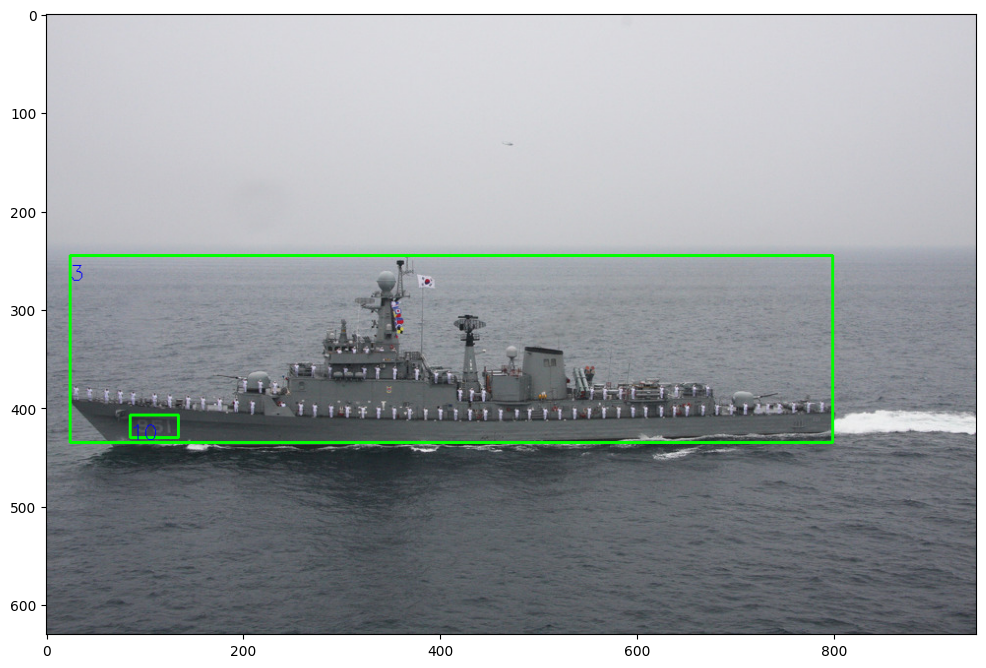

In [263]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/warship_detect_project/datasets/images/train/bs_951_001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
draw_img = img.copy()
height = img.shape[0]
width = img.shape[1]

with open('/content/drive/MyDrive/warship_detect_project/datasets/labels/train/bs_951_001.txt') as f:
  line = f.readlines()

  for i in line:
    split_line = i.strip().split(' ')
    left = (float(split_line[1]) - (float(split_line[3]) / 2)) * width
    top = (float(split_line[2]) - (float(split_line[4]) / 2)) * height
    right = (float(split_line[1]) + (float(split_line[3]) / 2)) * width
    bottom = (float(split_line[2]) + (float(split_line[4]) / 2)) * height

    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
    cv2.putText(draw_img, f'{split_line[0]}', (int(left), int(top) + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)

In [ ]:
# import subprocess
# import xml.dom.minidom

# # 셸 명령어 실행
# #output = subprocess.check_output(["cat", '/content/drive/Mydrive/warship_detect_project/raw_datasets/lables_xml/bs_31_8.xml'])

# with open('/content/drive/MyDrive/warship_detect_project/raw_datasets/labels_xml/bs_682_9.xml', 'r') as f:
#     output = f.read()

# # 바이너리로 반환된 결과를 문자열로 변환하여 저장
# #xml_content = output.decode("utf-8")

# # XML 파싱
# dom = xml.dom.minidom.parseString(output)

# # 보기 좋은 형식의 XML 문자열로 변환
# pretty_xml_content = dom.toprettyxml()

# # 결과 확인
# print(pretty_xml_content)

<?xml version="1.0" ?>
<annotation>
	
	
	<folder>work</folder>
	
	
	<filename>bs_682_9.jpg</filename>
	
	
	<path>C:\Users\kj\Desktop\work\bs_682_9.jpg</path>
	
	
	<source>
		
		
		<database>Unknown</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>682</width>
		
		
		<height>512</height>
		
		
		<depth>3</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>LST</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>5</xmin>
			
			
			<ymin>191</ymin>
			
			
			<xmax>574</xmax>
			
			
			<ymax>332</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>HullNum</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>51</xmin>
			
			
			<ymin>290</ymin>
			
			
			<xmax>89</xmax>
			
			
			<ymax>308</ymax>
			
		
		</bndbox>
		
	
	</object>
	

</annotation>



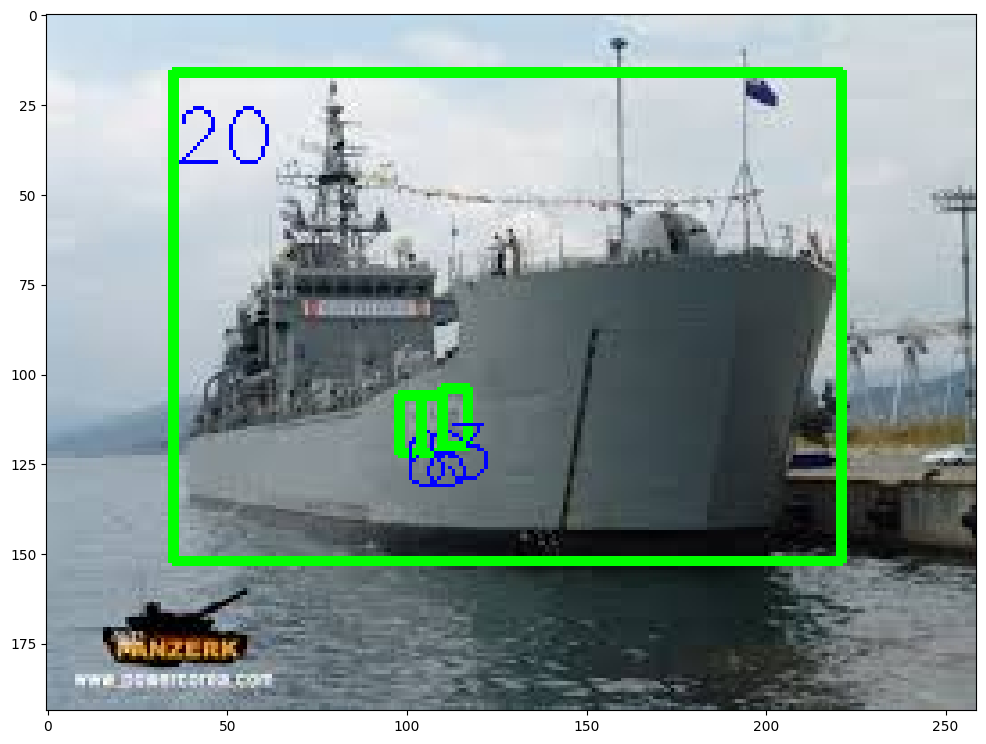

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/warship_detect_project/datasets/images/train/bs_683.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
draw_img = img.copy()
height = img.shape[0]
width = img.shape[1]

with open('/content/drive/MyDrive/warship_detect_project/datasets/labels/train/bs_683.txt') as f:
  line = f.readlines()

  for i in line:
    split_line = i.strip().split(' ')
    left = (float(split_line[1]) - (float(split_line[3]) / 2)) * width
    top = (float(split_line[2]) - (float(split_line[4]) / 2)) * height
    right = (float(split_line[1]) + (float(split_line[3]) / 2)) * width
    bottom = (float(split_line[2]) + (float(split_line[4]) / 2)) * height

    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
    cv2.putText(draw_img, f'{split_line[0]}', (int(left), int(top) + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)

In [280]:
!zip -r '/content/drive/MyDrive/datasets.zip' '/content/drive/MyDrive/warship_detect_project'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_2.jpg (deflated 0%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_3.jpg (deflated 0%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_5.jpg (deflated 1%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_6.jpg (deflated 2%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_7.jpg (deflated 3%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_718_1.jpg (deflated 1%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_8.jpg (deflated 1%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_721_8.jpg (deflated 1%)
  adding: content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/b

In [285]:
!unzip '/content/drive/MyDrive/datasets.zip' -d '/content/dataset'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_2.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_3.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_5.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_6.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_7.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_718_1.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_777_8.jpg  
  inflating: /content/dataset/content/drive/MyDrive/warship_detect_project/raw_datasets/warship_images/bs_721_8.jpg  
  inflating: /conten